In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
my_data = pd.read_csv("1991_advanced.csv", delimiter=",")
my_data[0:5]

,Pos,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,SF,21.4,0.618,0.092,0.400,4.7,10.0,7.4,14.9,2.4,...,12.6,23.5,9.7,2.4,12.2,0.176,4.5,0.1,4.7,5.6
1,PF,24.8,0.596,0.009,0.552,9.0,24.5,17.2,14.7,1.4,...,10.9,30.1,9.9,5.6,15.5,0.225,4.8,0.6,5.4,6.2
2,PG,20.9,0.547,0.162,0.246,3.0,8.4,5.7,36.8,3.1,...,13.6,24.7,7.4,2.5,9.9,0.148,4.5,-0.1,4.4,5.2
3,SF,16.6,0.499,0.008,0.283,6.3,15.7,10.7,17.1,2.6,...,12.4,22.7,2.6,2.9,5.4,0.081,0.5,0.4,0.9,2.3
4,PG,18.1,0.492,0.095,0.122,2.8,8.0,5.3,37.6,2.2,...,10.9,21.8,4.5,1.3,5.9,0.089,3.1,-1.1,2.0,3.2


In [3]:
X = my_data[['PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']].values
X[0:5]

array([[ 2.14e+01,  6.18e-01,  9.20e-02,  4.00e-01,  4.70e+00,  1.00e+01,
         7.40e+00,  1.49e+01,  2.40e+00,  1.10e+00,  1.26e+01,  2.35e+01,
         9.70e+00,  2.40e+00,  1.22e+01,  1.76e-01,  4.50e+00,  1.00e-01,
         4.70e+00,  5.60e+00],
       [ 2.48e+01,  5.96e-01,  9.00e-03,  5.52e-01,  9.00e+00,  2.45e+01,
         1.72e+01,  1.47e+01,  1.40e+00,  1.50e+00,  1.09e+01,  3.01e+01,
         9.90e+00,  5.60e+00,  1.55e+01,  2.25e-01,  4.80e+00,  6.00e-01,
         5.40e+00,  6.20e+00],
       [ 2.09e+01,  5.47e-01,  1.62e-01,  2.46e-01,  3.00e+00,  8.40e+00,
         5.70e+00,  3.68e+01,  3.10e+00,  2.00e-01,  1.36e+01,  2.47e+01,
         7.40e+00,  2.50e+00,  9.90e+00,  1.48e-01,  4.50e+00, -1.00e-01,
         4.40e+00,  5.20e+00],
       [ 1.66e+01,  4.99e-01,  8.00e-03,  2.83e-01,  6.30e+00,  1.57e+01,
         1.07e+01,  1.71e+01,  2.60e+00,  1.10e+00,  1.24e+01,  2.27e+01,
         2.60e+00,  2.90e+00,  5.40e+00,  8.10e-02,  5.00e-01,  4.00e-01,
         9.00e-01, 

In [4]:
y = my_data["Pos"]
y[0:5]

0    SF
1    PF
2    PG
3    SF
4    PG
Name: Pos, dtype: object

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [7]:
posTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
posTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [8]:
posTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [9]:
predTree = posTree.predict(X_testset)

In [10]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6666666666666666


In [11]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

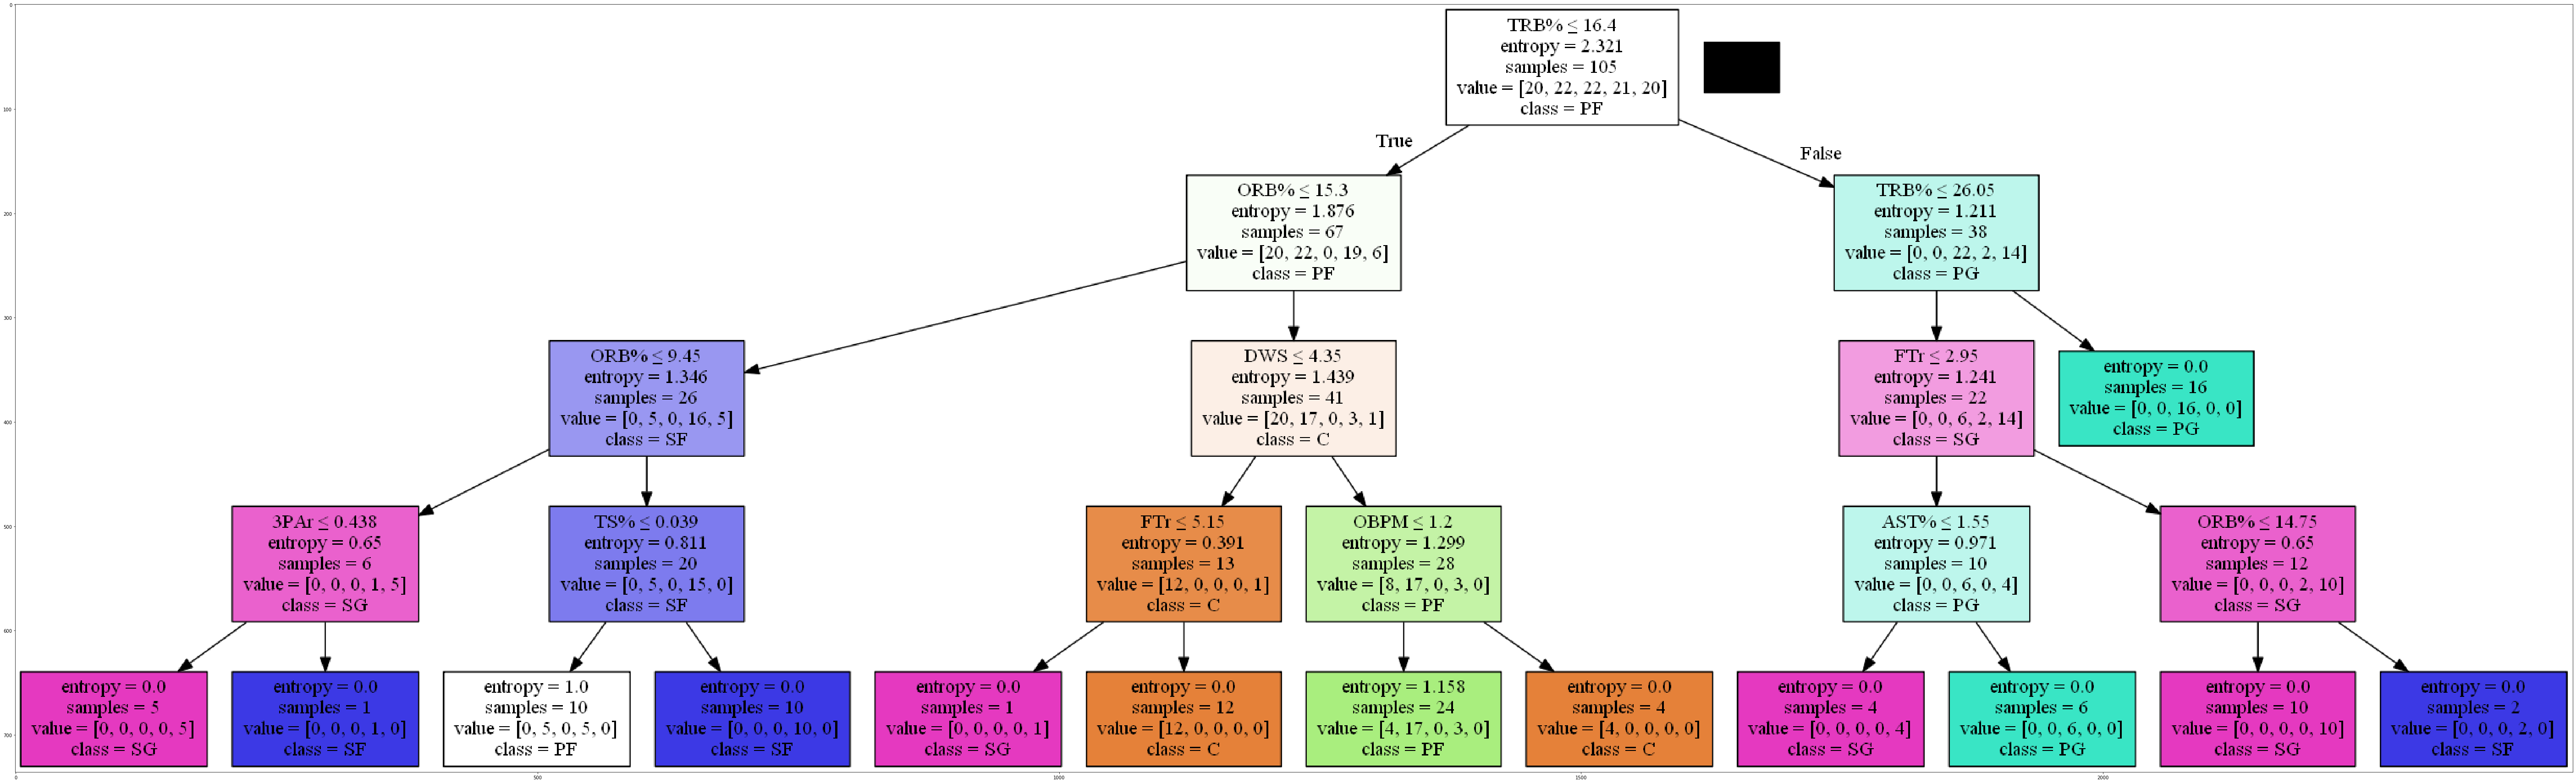

In [12]:
dot_data = StringIO()
filename = "postree.png"
featureNames = my_data.columns[0:20]
out=tree.export_graphviz(posTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')